In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def load_stock_data(ticker, start="2020-01-01"):
    """
    Fetch historical stock data for a given ticker from Yahoo Finance.
    """
    df = yf.download(ticker, start=start)
    return df[['Close']]  # Keep only closing price

def preprocess_data(df, sequence_length=100):
    """
    Prepare stock price data for LSTM model training.
    """
    scaler = MinMaxScaler(feature_range=(0,1))
    df_scaled = scaler.fit_transform(df)

    x, y = [], []
    for i in range(sequence_length, len(df_scaled)):
        x.append(df_scaled[i-sequence_length:i])
        y.append(df_scaled[i, 0])

    return np.array(x), np.array(y), scaler


In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

def build_lstm_model(input_shape):
    """
    Create an LSTM model for stock price prediction.
    """
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=60, activation='relu', return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=80, activation='relu', return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(units=120, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_model(model, x_train, y_train, epochs=50, batch_size=32):
    """
    Train the LSTM model on stock data.
    """
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model


In [15]:
# Function to train the model with validation
def train_model(model, x_train, y_train, x_val, y_val, epochs=50, batch_size=32):
    """
    Train the LSTM model on stock data with validation.
    """
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),  # Use validation data
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Print final training and validation loss
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"\n✅ Final Training Loss: {final_train_loss:.4f}")
    print(f"✅ Final Validation Loss: {final_val_loss:.4f}")

    return model, history

In [16]:
def predict_stock(model, scaler, df, sequence_length=100):
    """
    Predict stock prices using the trained LSTM model.
    """
    df_scaled = scaler.transform(df)
    x_test = []

    for i in range(sequence_length, len(df_scaled)):
        x_test.append(df_scaled[i-sequence_length:i])

    x_test = np.array(x_test)
    predictions = model.predict(x_test)
    return scaler.inverse_transform(predictions)  # Convert back to original price scale


In [17]:
# Function to plot actual vs predicted stock prices
def plot_predictions(actual, predicted):
    """
    Plot actual vs. predicted stock prices.
    """
    plt.figure(figsize=(12,6))
    plt.plot(actual, label="Actual Prices", color='blue')
    plt.plot(predicted, label="Predicted Prices", color='red', linestyle='dashed')
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Stock Price Prediction")
    plt.legend()
    plt.show()


In [18]:
# Function to plot training vs validation loss
def plot_training_history(history):
    """
    Plot training loss and validation loss over epochs.
    """
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss")
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 226ms/step - loss: 0.2184 - val_loss: 0.0210
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0210 - val_loss: 0.0134
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0151 - val_loss: 0.0162
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0138 - val_loss: 0.0129
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0120 - val_loss: 0.0136
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0144 - val_loss: 0.0101
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0129 - val_loss: 0.0155
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0120 - val_loss: 0.0121
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0137 - val_loss: 0.0126
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0131 - val_loss: 0.0105
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0133 - val_loss: 0.0101
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0109 - va

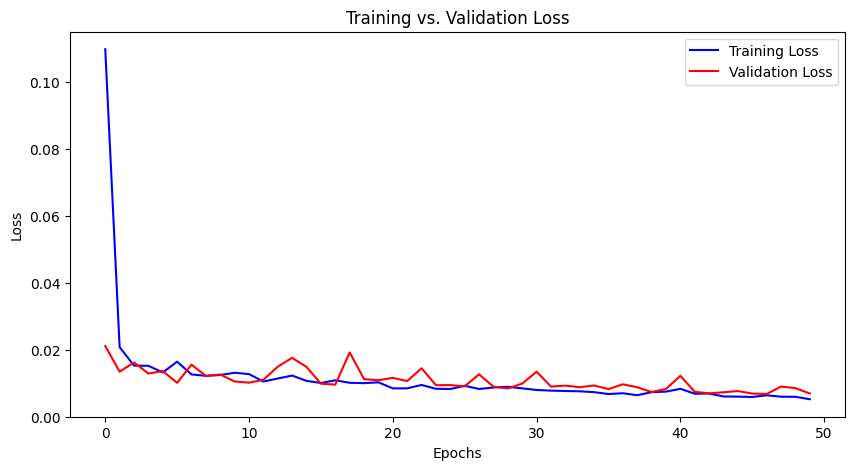

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


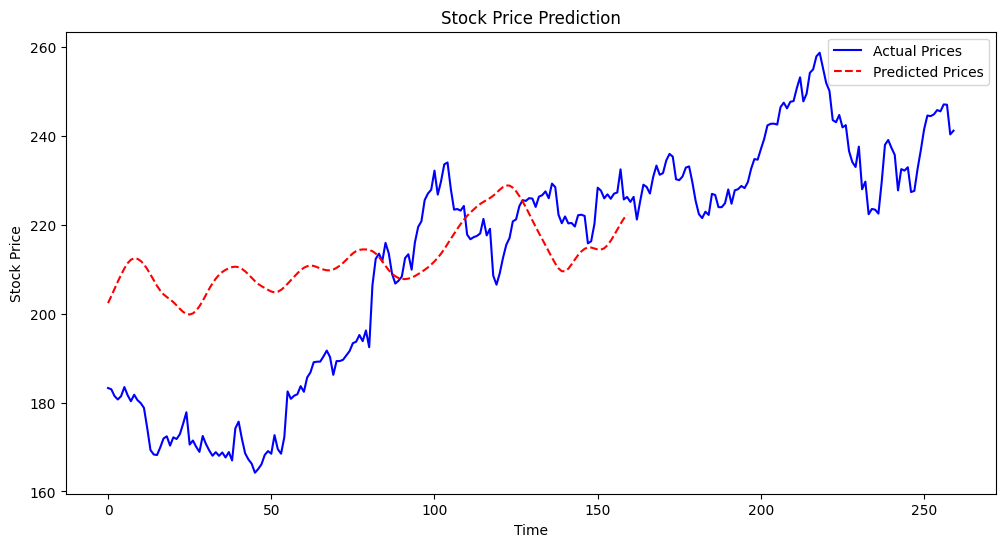

In [19]:
# MAIN EXECUTION FLOW
if __name__ == "__main__":
    # Load data
    ticker = "AAPL"  # Change this to any stock symbol
    df = load_stock_data(ticker)

    # Split data into training and validation sets
    split_ratio = 0.8
    train_size = int(len(df) * split_ratio)

    df_train = df[:train_size]
    df_val = df[train_size:]

    # Preprocess data
    x_train, y_train, scaler = preprocess_data(df_train)
    x_val, y_val, _ = preprocess_data(df_val)

    # Build & Train Model
    model = build_lstm_model(input_shape=(x_train.shape[1], 1))
    trained_model, history = train_model(model, x_train, y_train, x_val, y_val)

    # Plot Training History
    plot_training_history(history)

    # Make Predictions
    predictions = predict_stock(trained_model, scaler, df_val)

    # Plot Results
    plot_predictions(df_val['Close'].values, predictions)
